In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

In [2]:
df=pd.read_csv('big_mart_train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
per=df.isnull().sum()*100/len(df)
per

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [9]:
df.duplicated().sum()

0

# Univariate Imputation 

In [10]:
mean_weight=df['Item_Weight'].mean()
mean_weight

12.857645184135976

In [11]:
df['Item_weight_mean']=df['Item_Weight'].fillna(mean_weight)

In [12]:
print('item weight variannce before:',df['Item_Weight'].var())
print('item weight variannce after mean imputation:',df['Item_weight_mean'].var())

item weight variannce before: 21.56168825983637
item weight variannce after mean imputation: 17.860121735060453


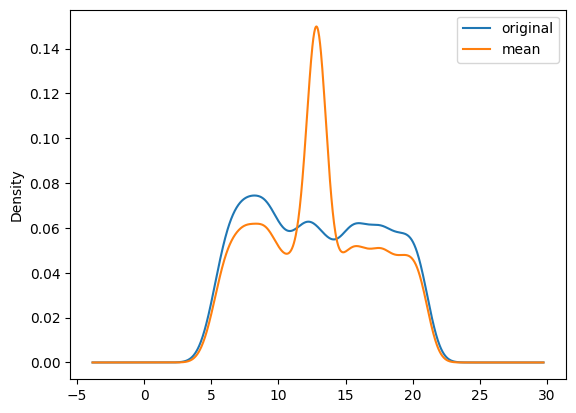

In [13]:
df['Item_Weight'].plot(kind='kde',label='original')
df['Item_weight_mean'].plot(kind='kde',label='mean')
plt.legend()

In [14]:
import seaborn as sns 

<Axes: >

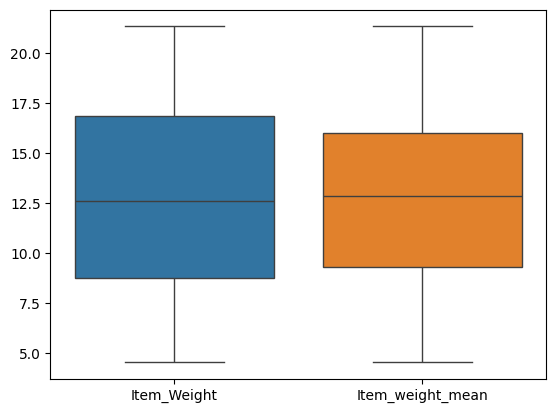

In [15]:
sns.boxplot([df['Item_Weight'],df['Item_weight_mean']])

# Multivariate Imputation 

In [16]:
from sklearn.impute import KNNImputer 

In [17]:
knn=KNNImputer(n_neighbors=10,weights='distance')

In [18]:
df['Item_weight_knn']=knn.fit_transform(df[['Item_Weight']]).ravel()

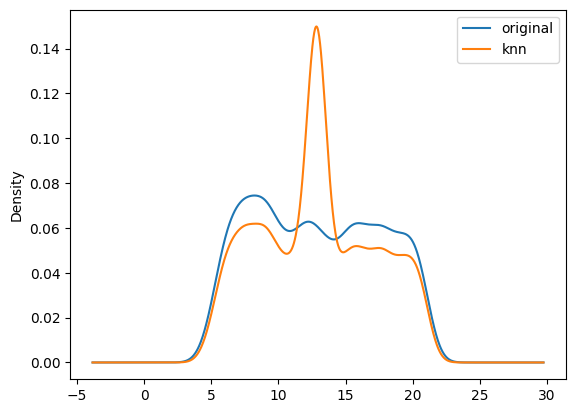

In [19]:
df['Item_Weight'].plot(kind='kde',label='original')
df['Item_weight_knn'].plot(kind='kde',label='knn')
plt.legend()

# using interpolation method 

In [20]:
df['Item_Weight_interpolate']=df['Item_Weight'].interpolate(method='linear')

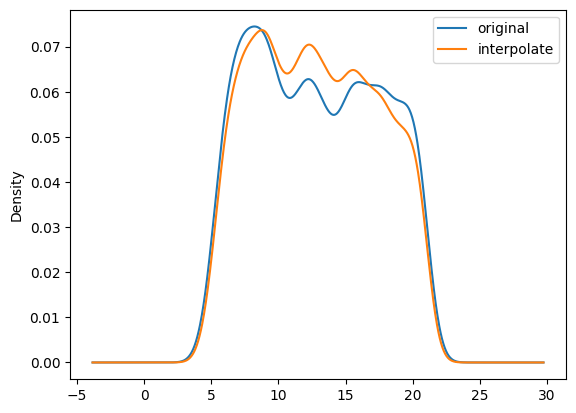

In [21]:
df['Item_Weight'].plot(kind='kde',label='original')
df['Item_Weight_interpolate'].plot(kind='kde',label='interpolate')
plt.legend()

In [22]:
df=df.drop(columns=['Item_Weight','Item_weight_knn','Item_weight_mean'])

In [23]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


# filling missing values in Outlet_size 

In [24]:
from sklearn.impute import SimpleImputer 

In [25]:
impute=SimpleImputer(strategy='most_frequent')

In [26]:
df['Outlet_Size']=impute.fit_transform(df[['Outlet_Size']]).ravel()

In [27]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [28]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

In [29]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [30]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','LF')

In [31]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('Low Fat','LF')

In [32]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [33]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [34]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [35]:
df['Item_Visibility']=df['Item_Visibility'].replace(0,np.nan)

In [36]:
df['Item_Visibility_interpolate']=df['Item_Visibility'].interpolate(method='linear')

In [37]:
df['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

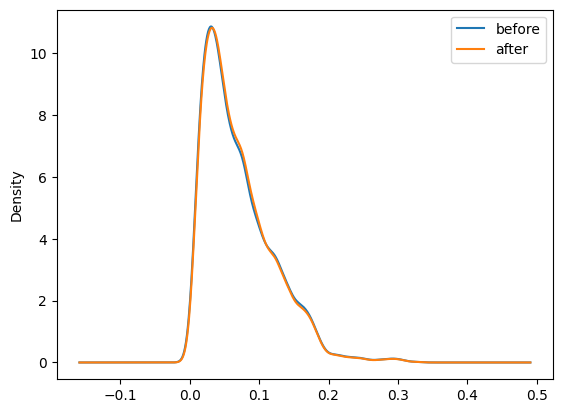

In [38]:
df['Item_Visibility'].plot(kind='kde',label='before')
df['Item_Visibility_interpolate'].plot(kind='kde',label='after')
plt.legend()
plt.show()

In [39]:
df=df.drop('Item_Visibility',axis=1)

In [40]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [41]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [42]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [43]:
# fd - food 
# dr - drinks 
# nc - non consumables

In [44]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x:x[:2])

In [45]:
df['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [46]:
df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [47]:
import datetime as dt 

In [48]:
current_year=dt.datetime.today().year

In [49]:
current_year

2024

In [50]:
df['Outlet_age']=current_year-df['Outlet_Establishment_Year']

In [51]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [52]:
df=df.drop('Outlet_Establishment_Year',axis=1)

In [53]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


# Handling Categorical data 

In [54]:
from sklearn.preprocessing import OrdinalEncoder 

In [55]:
df.select_dtypes(object).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [56]:
l1=[]
l1.append(df.select_dtypes(object).columns)

In [57]:
l1

[Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object')]

In [58]:
for i in l1:
    oe=OrdinalEncoder()
    df[i]=oe.fit_transform(df[i])


In [59]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,1.0,2.0,0.0,732.3800,19.20,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,37


In [60]:
X=df.drop('Item_Outlet_Sales',axis=1)

In [61]:
y=df['Item_Outlet_Sales']

# Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score

In [63]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
scores=np.mean(cross_val_score(rf,X,y,cv=5,scoring='r2'))
print(scores)

0.5572054682157882


# XgboostRF regressor 

In [64]:
from xgboost import XGBRFRegressor

In [65]:
xg=XGBRFRegressor()
scores=np.mean(cross_val_score(xg,X,y,cv=5,scoring='r2'))
print(scores)

0.5958242620881385


In [66]:
xg=XGBRFRegressor()
xg1=xg.fit(X,y)
xg1.feature_importances_

pd.DataFrame({
    'feature_names':X.columns,
    'importance score':xg1.feature_importances_
}).sort_values(by='importance score',ascending=False)

,feature_names,importance score
7,Outlet_Type,0.497271
3,Item_MRP,0.184249
10,Outlet_age,0.165072
4,Outlet_Identifier,0.114659
5,Outlet_Size,0.019132
6,Outlet_Location_Type,0.009140
9,Item_Visibility_interpolate,0.004347
8,Item_Weight_interpolate,0.002820
2,Item_Type,0.001988
0,Item_Identifier,0.000687


In [67]:
X=X.drop(columns=['Outlet_Location_Type',
'Item_Visibility_interpolate',
'Item_Weight_interpolate',
'Item_Type',
'Item_Identifier',
'Item_Fat_Content'])

In [68]:
X.head()

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,1.0,0.0,26
4,53.8614,1.0,0.0,1.0,37


In [69]:
xg=XGBRFRegressor()
scores=np.mean(cross_val_score(xg,X,y,cv=5,scoring='r2'))
print(scores)

0.5966529816890229


In [70]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
xg.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [73]:
y_pred=xg.predict(X_test)

In [74]:
mean_absolute_error(y_test,y_pred)

713.5958247614867

# prediction on unseen data 

In [75]:
data=[[141.6180,9.0,1.0,1.0,24]]
data=np.array(data)

In [76]:
y_pred=xg.predict(data)

In [77]:
print(y_pred)

[2061.821]


In [78]:
print(f'sales value will be between {y_pred-713.52} and {y_pred+713.52}')

sales value will be between [1348.301] and [2775.341]


# importing 

In [79]:
import joblib
joblib.dump(xg,'bigmart_model')

['bigmart_model']

In [80]:
model=joblib.load('bigmart_model')

In [81]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2061.821


In [82]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1347.401044921875 and 2776.241044921875
